# Convolutional Neural Networks

Прежде чем разбираться в том, как устроены сверточные нейронные сети, стоит понять, зачем они вообще нужны.

Мы уже познакомились с тем, как работают полносвязные сети. Почему бы не применять их для обработки изображений? Зачем понадобилось создавать новый тип нейросетей?

Причина проста: полносвязные нейросети крайне неэффективны, когда речь идет о работе с изображениями. Давайте разберёмся, в чём именно проблема.

Возьмём, к примеру, задачу классификации картинок из набора данных MNIST. MNIST — это коллекция черно-белых изображений рукописных цифр от 0 до 9, то есть всего имеется 10 классов. Размер каждого изображения — 28 на 28 пикселей.

На основе этого набора данных можно решать задачу классификации изображений по 10 категориям.

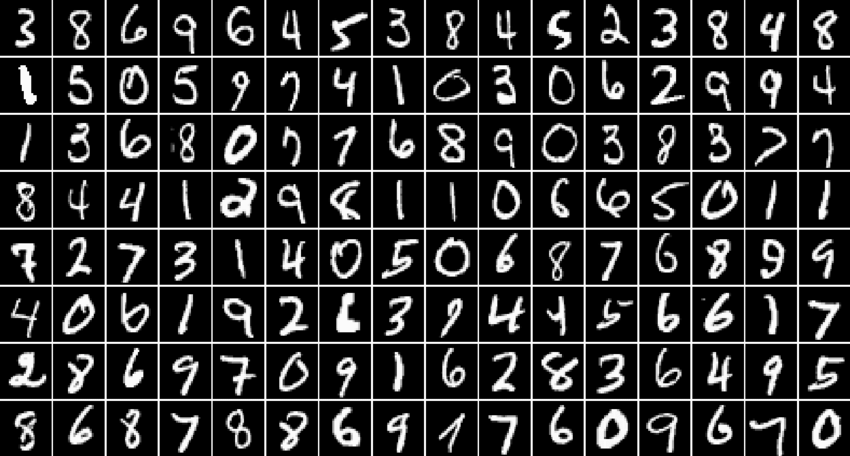

Чтобы использовать нейросети для классификации изображений MNIST, сначала нужно понять, как подать изображение на вход модели. Полносвязанная нейросеть принимает входные данные в виде вектора чисел. Если в её первом слое находится N нейронов, то и входной вектор должен иметь длину N.

Черно-белое изображение из MNIST — это двумерная матрица чисел. Каждое число в этой матрице представляет собой уровень яркости соответствующего пикселя изображения.

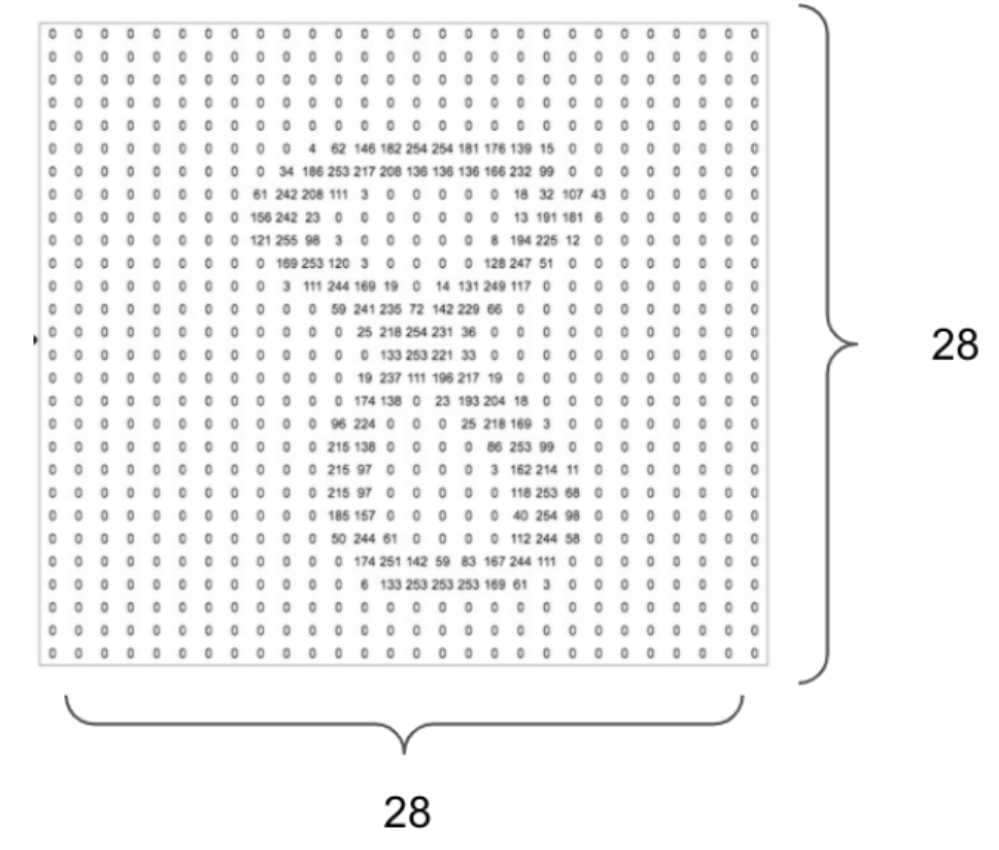

Чтобы передать изображение в нейросеть, необходимо преобразовать матрицу пикселей в вектор — эту операцию (flatten) называют «развёрткой» матрицы. Один из простых способов сделать это — последовательно соединить все строки матрицы в один длинный вектор. В результате матрица 28×28 превратится в вектор из 784 элементов. Следовательно, первый слой нейросети, которая будет работать с таким входом, должен содержать 784 нейрона. Используя этот подход и подавая изображения в развёрнутом виде, можно обучить полносвязную сеть распознавать изображения из датасета MNIST.

У такого способа построения сети для обработки изображений есть несколько минусов. Вот основные:

**Во-первых,** в первом слое нейросети оказывается огромное количество нейронов, а значит — и обучаемых параметров. Из-за этого модель легко может переобучиться.

**Во-вторых,** полносвязная сеть воспринимает разные участки изображения по-разному, даже если на этих участках находятся одинаковые элементы.

Обычно объекты на изображении занимают небольшие, компактные области — это называют принципом локальности (locality). Чтобы обнаружить какой-то объект, нужно анализировать именно локальные фрагменты изображения, а не рассматривать всю картинку целиком. Однако полносвязная нейросеть «видит» изображение полностью: каждый её слой одновременно обрабатывает все пиксели входного изображения.

# Свертка

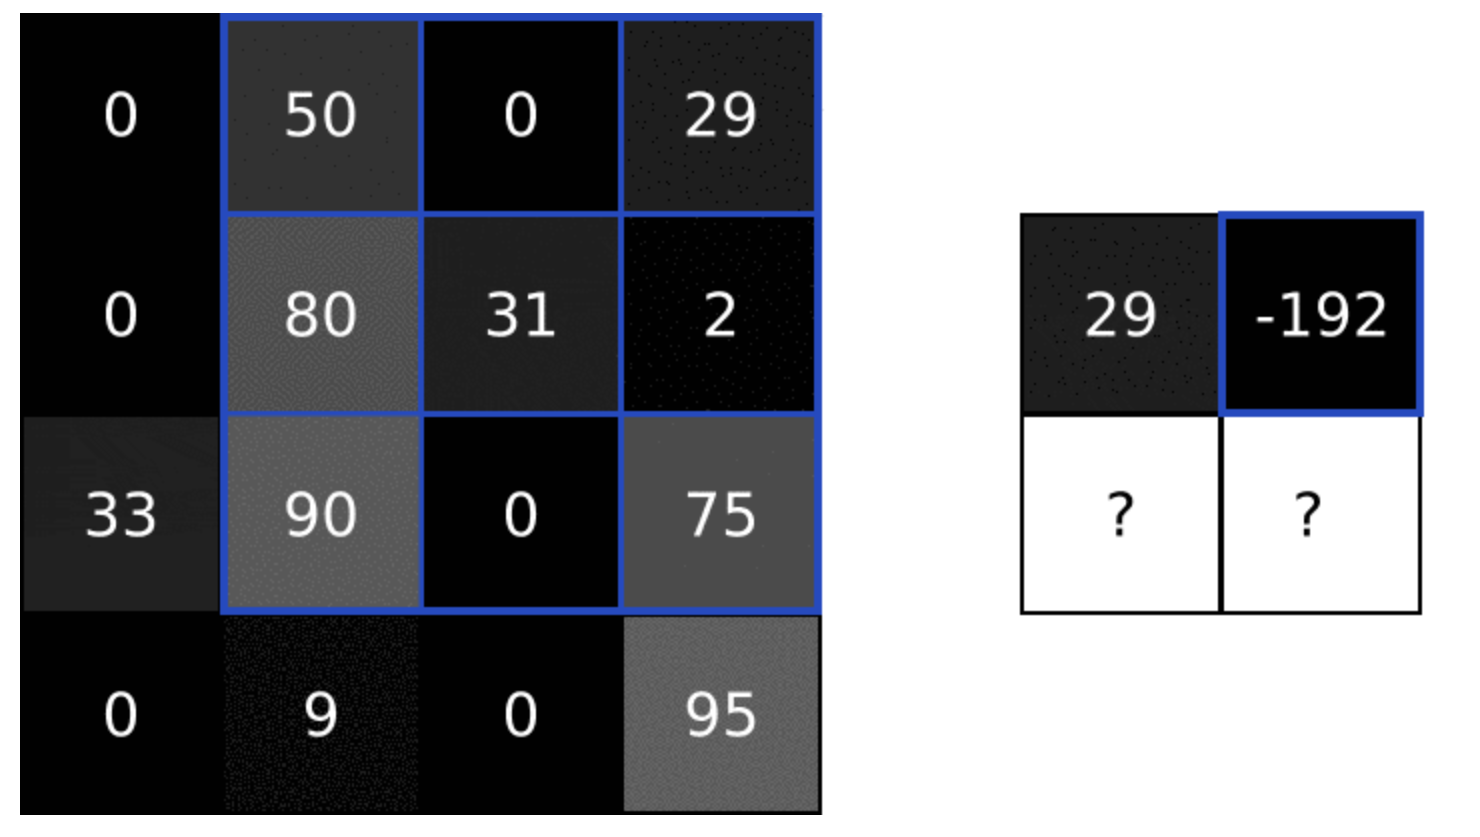

Операция свёртки заключается в применении фильтра. Фильтр (его также называют ядром, англ. kernel) — это матрица чисел, которая «скользит» по исходному изображению как окно и в каждой позиции вычисляет сумму произведений своих элементов на соответствующие элементы исходной матрицы.

**Зачем нужны несколько слоёв свёрток?** Потому что каждый следующий слой обрабатывает карты активаций, полученные от предыдущего. В обученной сети это приводит к тому, что более глубокие слои начинают реагировать на всё более сложные и абстрактные особенности исходного изображения.

Первый слой обычно извлекает самые простые элементы — например, где расположены вертикальные, горизонтальные или диагональные линии. Дальнейшие слои свёрток распознают уже более сложные структуры: отдельные части объектов — например, элементы тела животного, глаза, уши и другие характерные детали.

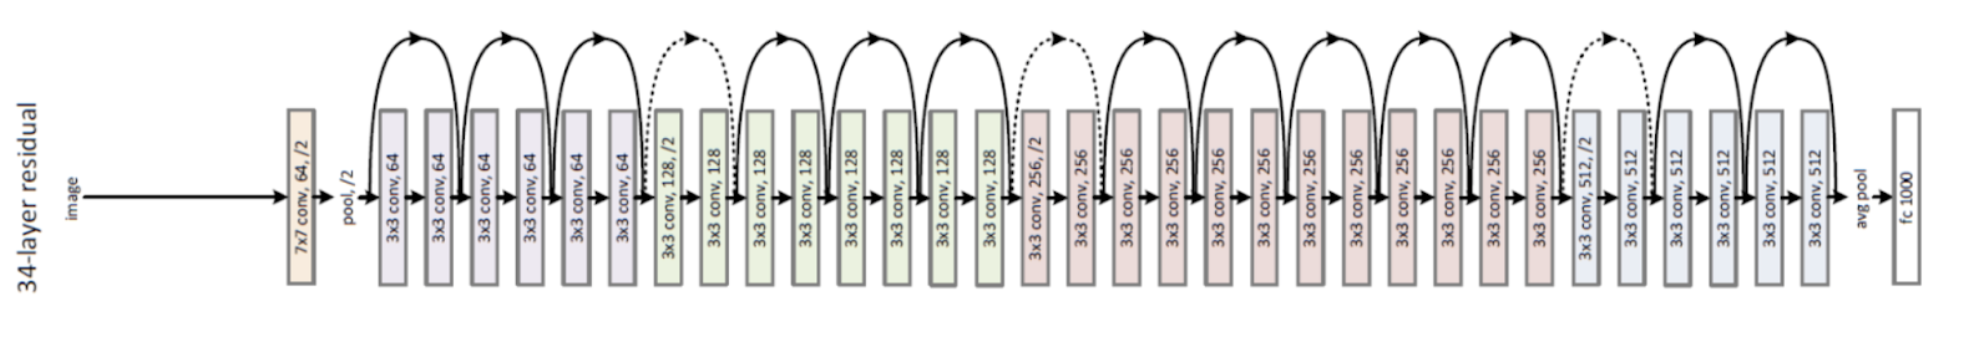

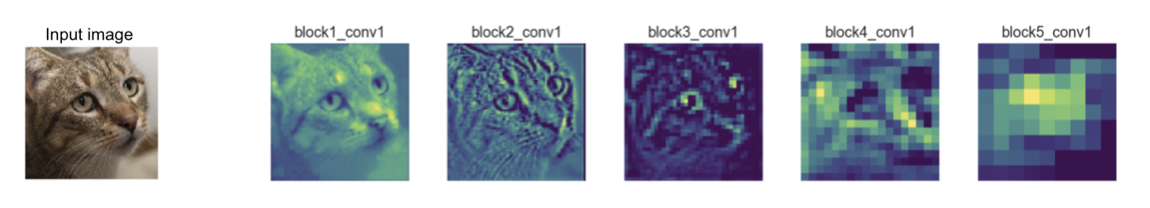

# Некоторые инструменты

## 1. Функции активации

После всех сверточных слоев сети нужны функции активации. Чаще всего, как и в полносвязных сетях, для сверток используется функция активации ReLU. Функция активации действует поэлементно на каждый пиксель карты активации:


### 2. Pooling

Pooling — это операция, которая уменьшает размер карт активации.

Выполняется она так:

* Берём карту активации и разбиваем её на фрагменты размером 2×2;
* Из каждого такого фрагмента выбираем одно значение — максимальный элемент;
* Эти максимальные значения и формируют новую карту активации. В результате карта размера (n × n) превращается в карту (n/2 × n/2).

Такую операцию называют MaxPooling с ядром размера 2. Ядро считают равным 2, потому что карта разбивается на блоки 2×2.


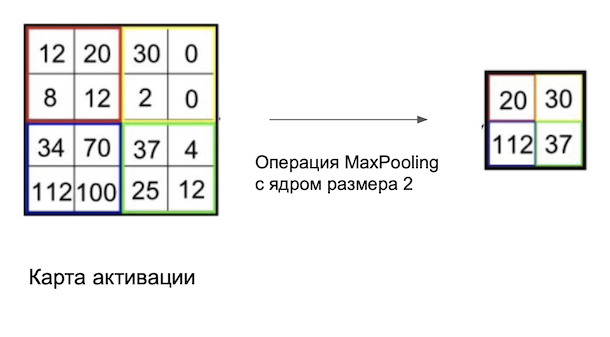



**Стоит отметить**, что у операции пулинга нет обучаемых параметров: она просто получает карту активации и уменьшает её размер вдвое определённым способом. Поэтому добавление пулинга никак не увеличивает число параметров сети. Его можно вставлять после любых сверточных слоёв — разумеется, если размеры карт активаций это позволяют.

### 3. Padding

Padding — это процесс добавления по краям карты активации рамки, заполненной нулями. Например, если к карте размером 4×4 добавить паддинг шириной 1, то вокруг неё создаётся нулевая граница толщиной один пиксель, и итоговый размер становится 6×6.

Такая операция используется для управления размерностью выходных карт активации.


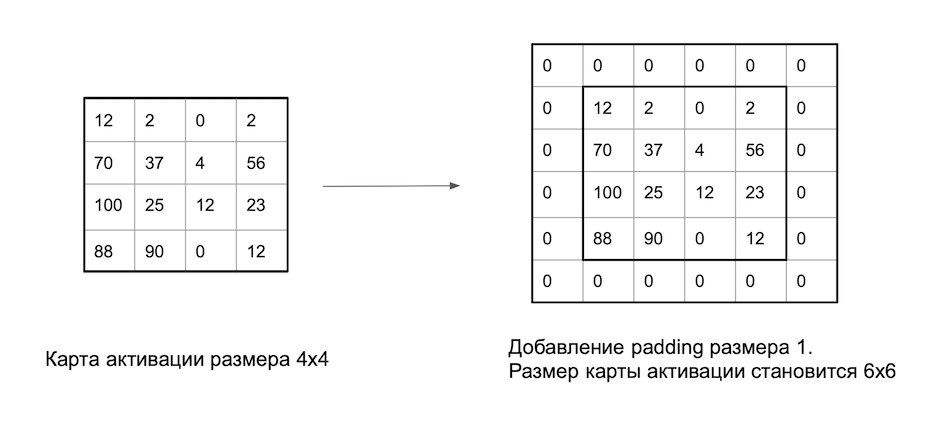

# Классификация изображений

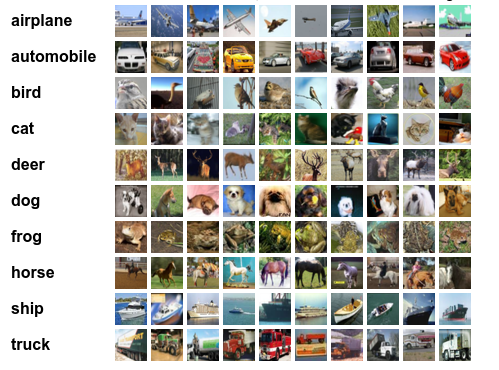

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

train_data = datasets.CIFAR10(root="./cifar10_data",
                              train=True,
                              download=True,
                              transform=transforms.ToTensor())

test_data = datasets.CIFAR10(root="./cifar10_data",
                             train=False,
                             download=True,
                             transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:06<00:00, 26.5MB/s]


In [ ]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar10_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_size = int(len(train_data) * 0.8)
val_size = len(train_data) - train_size

train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

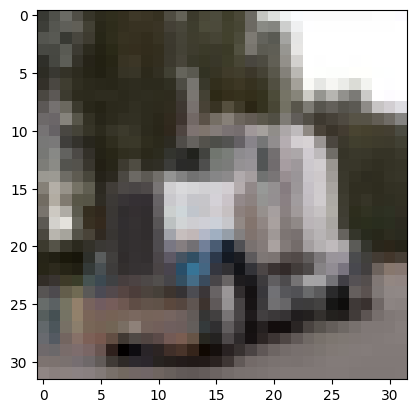

In [ ]:
plt.imshow(np.transpose(train_data[19][0], (1, 2, 0)))

### Нейронная сеть на pytorch

In [ ]:
# модуль, где определены слои для нейронных сетей
import torch.nn as nn
# модуль, где определены активации для слоев нейронных сетей
import torch.nn.functional as F
# метрика качества
from sklearn.metrics import accuracy_score

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()

        # размер исходной картинки 32х32

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3)) #30x30
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2)) #15x15
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=9, kernel_size=(3,3)) #13x13

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(13 * 13 * 9, 128)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))

        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_net = ConvNet().to(device)
device

device(type='cuda')

### Обучим CNN

In [ ]:
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-3
optimizer = torch.optim.Adam(conv_net.parameters(), lr=learning_rate)

In [ ]:
from IPython.display import clear_output
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def evaluate(model, dataloader, loss_fn):
    losses = []
    num_correct = 0
    num_elements = 0

    for X_batch, y_batch in dataloader:
        with torch.no_grad():
            logits = model(X_batch.to(device))
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1).cpu()
            num_correct += torch.sum(y_pred == y_batch)
            num_elements += len(X_batch)

    accuracy = num_correct / num_elements
    return accuracy, np.mean(losses)


def train(model, loss_fn, optimizer, n_epoch=3, log_every=50):
    train_losses, val_losses = [], []
    train_acc, val_acc = [], []
    num_iter = 0

    for epoch in range(n_epoch):
        print(f"Epoch: {epoch}")
        model.train()

        epoch_train_losses, epoch_train_acc = [], []

        for X_batch, y_batch in train_loader:
            logits = model(X_batch.to(device))
            loss = loss_fn(logits, y_batch.to(device))

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            num_iter += 1
            epoch_train_losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1).cpu()
            train_accuracy = torch.sum(y_batch == y_pred) / len(y_batch)
            epoch_train_acc.append(train_accuracy)

        train_losses.append(np.mean(epoch_train_losses))
        train_acc.append(np.mean(epoch_train_acc))

        model.eval()
        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn)
        val_acc.append(val_accuracy)
        val_losses.append(val_loss)

        clear_output(wait=True)

        fig, axes = plt.subplots(2, 1, figsize=(14, 7))
        axes[0].plot(range(len(train_losses)), train_losses, c='b', label='Train Loss')
        axes[0].plot(range(len(val_losses)), val_losses, c='r', label='Val Loss')
        axes[0].set_title(f'Loss, epochs done: {epoch}')
        axes[0].legend()

        axes[1].plot(range(len(train_acc)), train_acc, c='b', label='Train Acc')
        axes[1].plot(range(len(val_acc)), val_acc, c='r', label='Val Acc')
        axes[1].set_title(f'Accuracy, epochs done: {epoch}')
        axes[1].legend()

        plt.show()

    return model


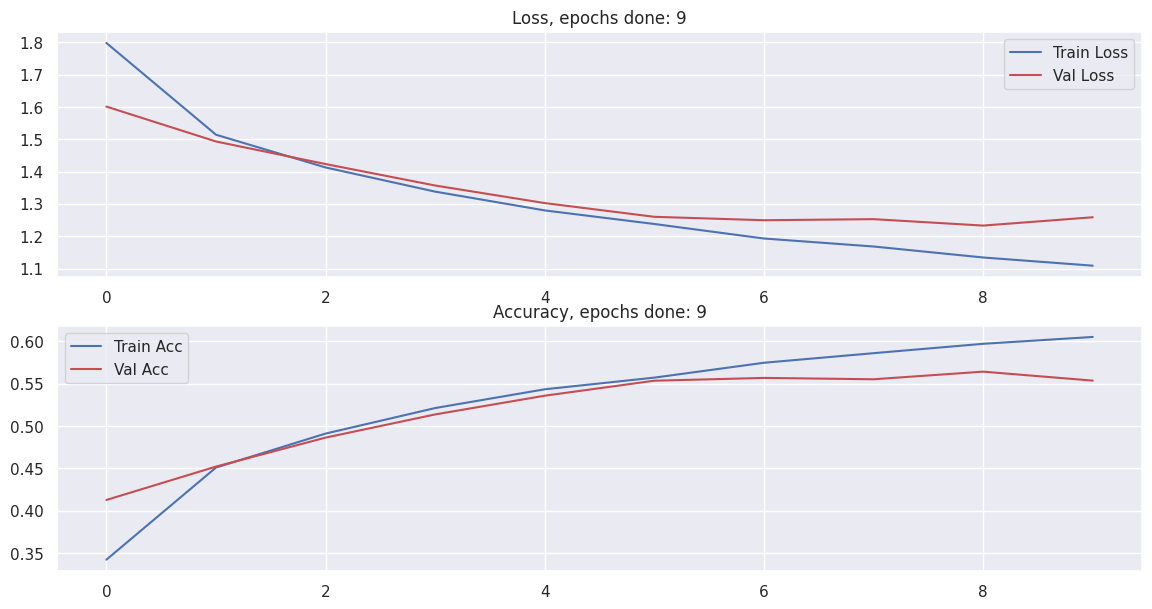

In [ ]:
conv_net = train(conv_net, loss_fn, optimizer, n_epoch=10)

In [ ]:
train_accuracy, _ = evaluate(conv_net, train_loader, loss_fn)
print('Train accuracy is', train_accuracy)

Train accuracy is tensor(0.6416)


In [ ]:
test_accuracy, _ = evaluate(conv_net, test_loader, loss_fn)
print('Test accuracy is', test_accuracy)

Test accuracy is tensor(0.5952)


## Большие нейросетевые модели

[ImageNet](http://www.image-net.org) — это база изображений, разделённых на большое количество категорий. На этом датасете можно решать задачи классификации изображений. Существуют две версии ImageNet:

* Старая версия: 1,000 классов, всего 1,431,167 изображений (1,281,167 для обучения, 50,000 для валидации, 100,000 для теста).
* Новая версия: 21,000 классов, всего 14,197,122 изображений.


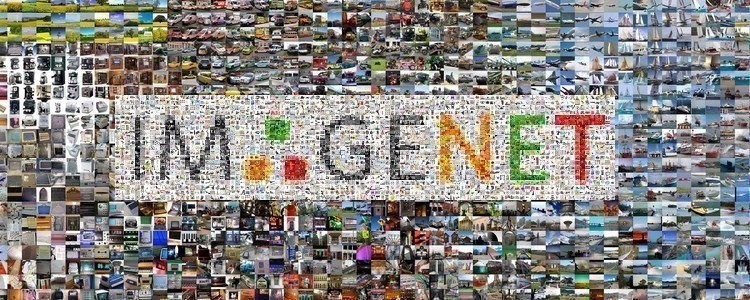

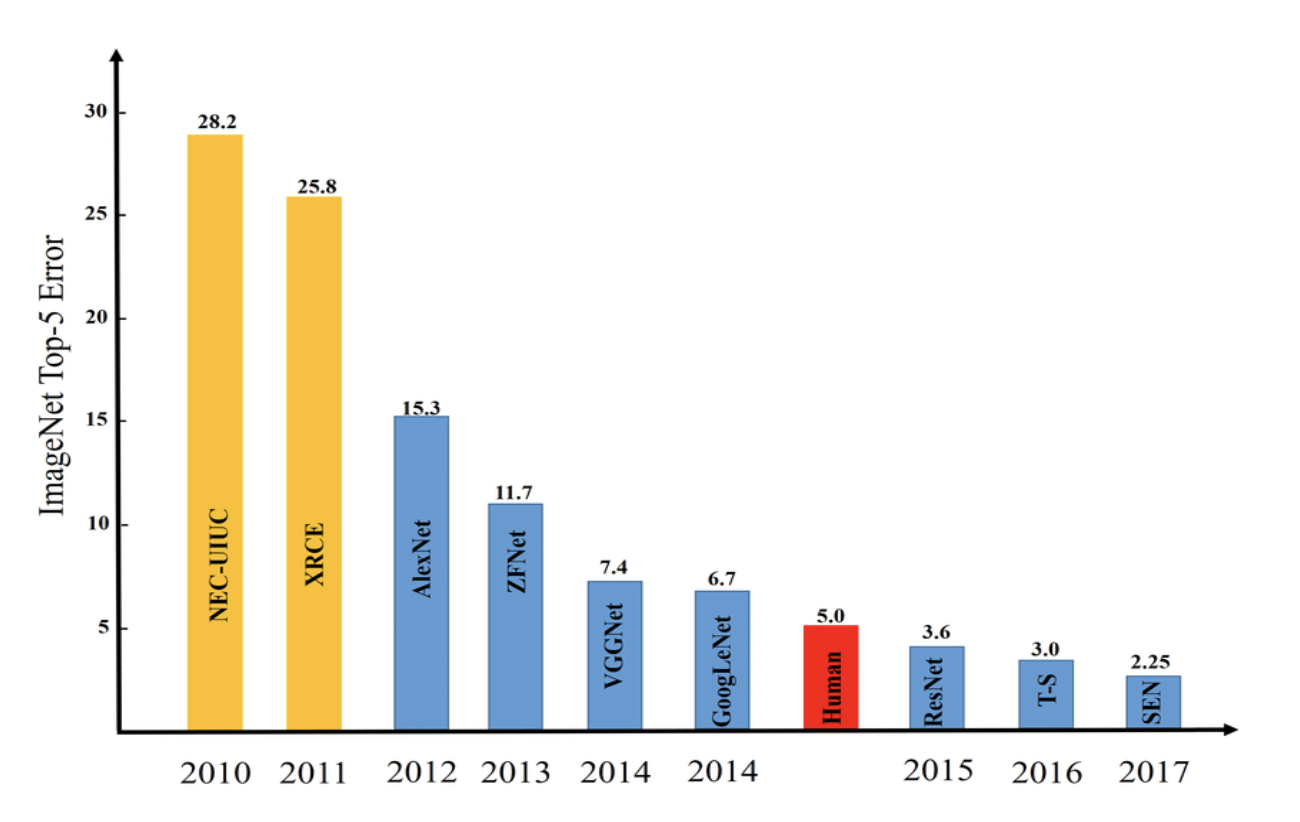

Вот перефразированный вариант текста:

Кратко обсудим известные архитектуры нейросетей (и ещё несколько, которых нет на таймлайне):

* **NEC-UIUC, XRCE** — не нейронные модели, основанные на классических методах машинного обучения;
* **AlexNet** — первая сверточная нейросеть, показавшая выдающиеся результаты на ImageNet. Этот прорыв считается революционным для глубокого обучения: тогда стало ясно, что нейросети могут эффективно работать с изображениями. Архитектура AlexNet довольно простая и состоит из знакомых элементов: свёртки (conv), ReLU, полносвязные слои (fc), batch normalization и dropout;
* **ZFNet, VGG** — тоже сверточные нейросети, но более глубокие по сравнению с AlexNet.

Успех VGG во многом объясняется увеличением числа свёрточных слоев. Логично: больше слоёв и, следовательно, больше параметров позволяют модели лучше учитывать сложные зависимости в данных. После этого исследователи стали экспериментировать с ещё более глубокими сетями, надеясь на улучшение результатов.

Однако оказалось, что чрезмерное увеличение числа слоёв приводит к ухудшению обучения из-за **проблемы затухания градиентов**.


## Transfer Learning

**Проблема, которую помогает решить Transfer Learning:**

Когда обучающий датасет небольшой, нейросети часто переобучаются, особенно если задача сложная. Пример такой задачи — классификация изображений опухолей. В медицине собрать большие датасеты сложно, а сами задачи требуют учёта разнообразных форм и размеров опухолей.

Другой пример — машинный перевод для редких языков. Для обучения модели перевода с одного языка на другой нужны большие корпуса параллельных предложений (т.е. предложение на одном языке и его точный перевод на другой). Обычно такие данные собираются из интернета, например, из Википедии, где одна статья переведена на несколько языков. Но для редких языков таких данных мало, и собрать их в достаточном объёме практически невозможно.

Эта проблема встречается не только в медицине или машинном переводе. Современные задачи машинного обучения становятся всё сложнее, а нейросети — глубже, что требует всё больше данных. И, как правило, данных всегда недостаточно.

Один из способов решить эту проблему — **transfer learning**, то есть перенос знаний от одной модели к другой. Один из самых простых подходов в transfer learning — это **дообучение (fine-tuning)**.


In [ ]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.com/d/eS6LL7bLmrlO7w) -o dogs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  218M  100  218M    0     0  9806k      0  0:00:22  0:00:22 --:--:-- 12.9M


In [ ]:
!unzip -qq dogs.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

In [ ]:
import torchvision.transforms as transforms

resnet_transforms = transforms.Compose([
    transforms.Resize(256),                     # приводим размер каждой картинки к 256x256
    transforms.CenterCrop(224),                 # вырезаем центральный кусок 224x224
    transforms.RandomPerspective(distortion_scale=0.6, p=1.0),  # случайная перспектива
    transforms.ToTensor(),                      # конвертируем картинку в torch.Tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],            # нормализация по каналам RGB
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:

train_data = datasets.ImageFolder('./dogs/train', transform=resnet_transforms)
val_data   = datasets.ImageFolder('./dogs/valid', transform=resnet_transforms)
test_data  = datasets.ImageFolder('./dogs/test', transform=resnet_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader  = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

model = models.resnet18(pretrained=True)
model


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 217MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(512, 70)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Проходим по блокам модели
for i, layer in enumerate(model.children()):
    # Замораживаем первые 9 блоков
    if i < 9:
        for param in layer.parameters():
            param.requires_grad = False


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
def evaluate(model, dataloader, loss_fn):
    model.eval()
    losses = []
    num_correct = 0
    num_elements = 0

    for X_batch, y_batch in dataloader:
        num_elements += len(y_batch)
        with torch.no_grad():
            logits = model(X_batch.to(device))
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())

            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == y_batch)

    accuracy = num_correct / num_elements
    return accuracy.numpy(), np.mean(losses)


def train(model, loss_fn, optimizer, n_epoch=3):
    for epoch in range(n_epoch):
        print(f"Epoch: {epoch + 1}")
        model.train()
        running_losses = []
        running_accuracies = []

        for i, (X_batch, y_batch) in enumerate(train_loader):
            logits = model(X_batch.to(device))
            loss = loss_fn(logits, y_batch.to(device))
            running_losses.append(loss.item())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            y_pred = torch.argmax(logits, dim=1)
            train_accuracy = torch.sum(y_batch == y_pred.cpu()) / len(y_batch)
            running_accuracies.append(train_accuracy)

            if (i + 1) % 50 == 0:
                print(
                    f"Средние train лосс и accuracy на последних 50 итерациях: "
                    f"{np.mean(running_losses):.4f}, {np.mean(running_accuracies):.4f}"
                )

        model.eval()
        val_accuracy, val_loss = evaluate(model, val_loader, loss_fn)
        print(
            f"Эпоха {epoch + 1}/{n_epoch}: val лосс и accuracy: {val_loss:.4f}, {val_accuracy:.4f}"
        )

    return model


In [ ]:
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
model = train(model, loss_fn, optimizer, n_epoch=3)

Epoch: 1
Средние train лосс и accuracy на последних 50 итерациях: 3.5402, 0.2100
Средние train лосс и accuracy на последних 50 итерациях: 2.9113, 0.3709
Эпоха 1/3: val лосс и accuracy: 1.4994, 0.7329
Epoch: 2
Средние train лосс и accuracy на последних 50 итерациях: 1.4992, 0.6631
Средние train лосс и accuracy на последних 50 итерациях: 1.3904, 0.6825
Эпоха 2/3: val лосс и accuracy: 1.0224, 0.7971
Epoch: 3
Средние train лосс и accuracy на последних 50 итерациях: 1.0733, 0.7462
Средние train лосс и accuracy на последних 50 итерациях: 1.0463, 0.7469
Эпоха 3/3: val лосс и accuracy: 0.9096, 0.8114


In [ ]:
test_accuracy, _ = evaluate(model, test_loader, loss_fn)
print('Accuracy на тесте', test_accuracy)

Accuracy на тесте 0.81142855
